## Problem 1: Visualise data in a static map (10 points)


Create a *static* **thematic map** using the skills you learnt during lesson 5. The map should <br>
contain more than one layer (from at least two different data sets). Pay attention to classification <br>
and visualisation (appropriate colour scheme choice, etc.). Write your code in this notebook, and <br>
store the resulting maps in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder.

### Topic of the map

- Use any of the data sets we have used during the course (travel time data, population grid), or <br>
  any other data set of your interest (for example, [open data sets from Statistics Finland](https://www.stat.fi/org/avoindata/index_en.html), <br>
  or the open geo-data from [the Helsinki Region Infoshare](https://hri.fi/en)). If you download <br>
  data sets, add, commit, and push them to the `DATA_DIRECTORY`. Be sure to include an attribution <br>
  to each data set in your output map!
- Feel free to start from and adapt examples from the course material! You can take one step further <br>
  and add additional analysis to, e.g., the shopping centre dominance or the population within vincinity <br>
  of certain addresses)

### Criteria

- The map has more than one data layer (for instance, the results of an analysis, and the road network <br>
  to illustrate a complex spatial pattern). If (and only if) you think it adds additional value, feel <br>
  free to add a base map (but a base map does not count as an own layer) (2 points)
- The map portrays the output of an analysis or a classification that adds value beyond just displaying <br>
  the raw data (3 points)
- The map follows good cartographic practices (appropriate map extent and zoom level, colour scheme, <br>
  legend and data sources, etc.) (5 points)

### Output

- Save the map(s) in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder, remember to add, commit, <br>
  and push them to the GitHub repository
- Remember to also add, commit, and push input data sets and code

---

In [60]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
OUTPUT_DIRECTORY = NOTEBOOK_PATH / "docs"

In [57]:
from pathlib import Path

# Define other paths using pathlib
EX4_DATA_PATH = Path('C:/Users/Steph/Documents/autogis_23/autogis-ex4-neesteph/data')
EX3_DATA_PATH = Path('C:/Users/Steph/Documents/autogis_23/autogis-ex3-neesteph/data')

In [2]:
# ADD YOUR OWN CODE HERE

In [ ]:
# Base: Areas of dominance (ex4)
# Points layer for each shopping mall (ex3)
# Lines layer for public transportation https://hri.fi/data/en_GB/dataset/hsl-n-linjat 

In [37]:
import geopandas as gpd

# Read shp of Helsinki public transport lines
pt = gpd.read_file(DATA_DIRECTORY / "HLS_pt_lines\\HSL%3An_linjat.shp")

# Select and rename columns 
pt = pt[["FID", "NUMERO", "VERKKO", "geometry"]]
pt = pt.rename(
    columns={
        "NUMERO": "NUMBER",
        "VERKKO": "NETWORK"
    }
)

pt.head()

,FID,NUMBER,NETWORK,geometry
0,1,1001,3,"MULTILINESTRING ((24.93416 60.15842, 24.93365 ..."
1,2,1001,3,"MULTILINESTRING ((24.95455 60.21654, 24.95477 ..."
2,3,1001 5,3,"MULTILINESTRING ((24.96808 60.20782, 24.96806 ..."
3,4,1001 6,3,"MULTILINESTRING ((24.96808 60.20782, 24.96806 ..."
4,5,1001 7,3,"MULTILINESTRING ((24.92699 60.18202, 24.92732 ..."


In [41]:
# Check data type of NETWORK column
# Gives dtype('O')
pt["NETWORK"].dtype

# Convert dtype from obj to int using .astype() function
pt["NETWORK"] = pt["NETWORK"].astype("int")
pt["NETWORK"].dtype

dtype('int64')

<Axes: >

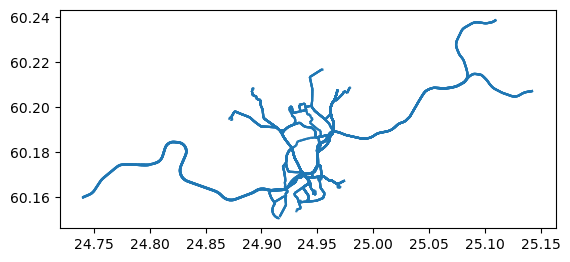

In [44]:
# Look at each network
pt["NETWORK"].unique()

# Filter data to include only metro (2) and tram (3) lines
# OR condition represented by | operator
pt = pt[(pt["NETWORK"] == 2) | (pt["NETWORK"] == 3)]

pt.plot()

In [94]:
# Create column that assigns either metro or tram to each line
pt["MODE"] = ""

# Loop through each row using itertuples() function and assign values row by row
# Ensure that only specified row is modified using .at function (access a single value for a row/column pair by label)
for row in pt.itertuples():
    if row.NETWORK == 2:
        pt.at[row.Index, "MODE"] = "Metro"
    elif row.NETWORK == 3:
        pt.at[row.Index, "MODE"] = "Tram"

"""
ALT: Boolean Indexing

The .loc function accesses a group of rows and columns by label(s).

pt.loc[pt["NETWORK"] == 2, "MODE"] = "Metro"
pt.loc[pt["NETWORK"] == 3, "MODE"] = "Tram"

NOTE: .loc > .itertuples > .iterrows (efficiency)
"""

pt.head()

,FID,NUMBER,NETWORK,geometry,MODE
0,1,1001,3,"MULTILINESTRING ((385336.065 6670847.835, 3853...",Tram
1,2,1001,3,"MULTILINESTRING ((386668.402 6677283.169, 3866...",Tram
2,3,1001 5,3,"MULTILINESTRING ((387387.758 6676288.737, 3873...",Tram
3,4,1001 6,3,"MULTILINESTRING ((387387.758 6676288.737, 3873...",Tram
4,5,1001 7,3,"MULTILINESTRING ((385020.699 6673487.158, 3850...",Tram


In [52]:
# Load YKR grid gdf from ex 4
grid = gpd.read_file(EX4_DATA_PATH / "YKR_grid_EPSG3067.gpkg")

grid.head()

,YKR_ID,geometry
0,5785640,"POLYGON ((382000 6697750, 381750 6697750, 3817..."
1,5785641,"POLYGON ((382250 6697750, 382000 6697750, 3820..."
2,5785642,"POLYGON ((382500 6697750, 382250 6697750, 3822..."
3,5785643,"POLYGON ((382750 6697750, 382500 6697750, 3825..."
4,5787544,"POLYGON ((381250 6697500, 381000 6697500, 3810..."


In [53]:
import pandas as pd
import numpy as np

# Create list of travel time/shopping centre data sets
# Use glob() pattern search functionality to find files
# NOTE: glob() returns an iterator
shopping_centres = list(EX4_DATA_PATH.glob("travel_times_to_*"))

# Dictionary to store df
df_dict = {}

# Use for loop to iterate through each travel time/shopping centre data set in the list
for fp in shopping_centres:

    # Convert file name from path object to string using .name attribute
    file_name = fp.name
    
    # Create variable name for each file
    # file_name.split("_") splits the entire file name into a list of parts based on "_" : ["travel", "times", "to", ..., "Jumbo.txt"]
    # [-1] takes the last part of the split list : "Jumbo.txt"
    # split(".")[0] splits the name into parts based on "." and takes the first part of the list : "Jumbo"
    variable_name = file_name.split("_")[-1].split(".")[0]

    # Read the file and assign it to the dictionary
    df_dict[variable_name] = pd.read_csv(fp, sep=";")

df_dict  

{'Jumbo':        from_id    to_id  walk_t  walk_d  car_r_t  car_r_d  car_m_t  car_m_d  \
 0      5785640  5878070     318   22279       39    23233       34    23233   
 1      5785641  5878070     281   19662       39    23444       34    23444   
 2      5785642  5878070     282   19742       45    17666       41    17666   
 3      5785643  5878070     286   20034       46    24695       40    24698   
 4      5787544  5878070     311   21789       38    22807       33    22807   
 ...        ...      ...     ...     ...      ...      ...      ...      ...   
 13226  6016698  5878070     464   32472       58    38658       51    38635   
 13227  6016699  5878070     466   32599       60    38345       53    38323   
 13228  6018252       -1      -1      -1       -1       -1       -1       -1   
 13229  6018253  5878070     469   32829       59    38835       51    38812   
 13230  6018254  5878070     467   32699       61    38933       54    38910   
 
        pt_r_t  pt_r_tt  pt_r

In [54]:
# Loop through each df in dict using .items() function
for key, df in df_dict.items():
    
    # Replace no-data values w/ NaN
    df[df == -1] = np.nan

    # Discard irrelevant columns
    df = df[["from_id", "pt_r_t"]]

    # Rename columns to include reference to shopping centre
    df_dict[key] = df.rename(
        columns={
            "pt_r_t": f"pt_r_t_{key}"
        }
    )

In [55]:
# For two df w/ the same index and length, use join() function
# For two gdf, use spatial join: .sjoin()
# For two df w/ common key attribute, use merge() function

# For two df w/ common key attribute but different column names, set the index of both to refer to the same column and use join() function

# Set indices
grid = grid.set_index("YKR_ID")

for key, df in df_dict.items():
    df_dict[key] = df.set_index("from_id")

# Join df using join() function and specify how parameter
# Left: use calling frame’s index (or column if on is specified)
for key, df in df_dict.items():
    grid = grid.join(df, how="left")

grid.head()

,geometry,pt_r_t_Jumbo,pt_r_t_Dixi,pt_r_t_Myyrmanni,pt_r_t_Itis,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Ruoholahti
YKR_ID,,,,,,,,
5785640,"POLYGON ((382000 6697750, 381750 6697750, 3817...",101.0,102.0,90.0,132.0,110.0,141.0,118.0
5785641,"POLYGON ((382250 6697750, 382000 6697750, 3820...",108.0,109.0,93.0,135.0,113.0,143.0,121.0
5785642,"POLYGON ((382500 6697750, 382250 6697750, 3822...",109.0,111.0,95.0,137.0,115.0,145.0,123.0
5785643,"POLYGON ((382750 6697750, 382500 6697750, 3825...",114.0,115.0,99.0,141.0,119.0,149.0,127.0
5787544,"POLYGON ((381250 6697500, 381000 6697500, 3810...",98.0,99.0,83.0,125.0,103.0,134.0,111.0


In [56]:
# Select which columns to compare based on integer indexing using .iloc[] function
# Find min travel time using .min() function
# Assign value to new column
grid["min_travel_time"] = grid.iloc[:, 1:8].min(axis=1)

# Find which shopping centre is the closest (has the min travel time) using .idxmin() function
# Assign shopping centre name to new column
grid["closest_shopping_centre"] = grid.iloc[:, 1:8].idxmin(axis=1)

# Split so that output contains only shopping centre name 
grid["closest_shopping_centre"] = grid["closest_shopping_centre"].str.split("_").str[-1]

grid.head()

C:\Users\Steph\AppData\Local\Temp\ipykernel_9416\3635397031.py:8: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  grid["closest_shopping_centre"] = grid.iloc[:, 1:8].idxmin(axis=1)


,geometry,pt_r_t_Jumbo,pt_r_t_Dixi,pt_r_t_Myyrmanni,pt_r_t_Itis,pt_r_t_Forum,pt_r_t_Omena,pt_r_t_Ruoholahti,min_travel_time,closest_shopping_centre
YKR_ID,,,,,,,,,,
5785640,"POLYGON ((382000 6697750, 381750 6697750, 3817...",101.0,102.0,90.0,132.0,110.0,141.0,118.0,90.0,Myyrmanni
5785641,"POLYGON ((382250 6697750, 382000 6697750, 3820...",108.0,109.0,93.0,135.0,113.0,143.0,121.0,93.0,Myyrmanni
5785642,"POLYGON ((382500 6697750, 382250 6697750, 3822...",109.0,111.0,95.0,137.0,115.0,145.0,123.0,95.0,Myyrmanni
5785643,"POLYGON ((382750 6697750, 382500 6697750, 3825...",114.0,115.0,99.0,141.0,119.0,149.0,127.0,99.0,Myyrmanni
5787544,"POLYGON ((381250 6697500, 381000 6697500, 3810...",98.0,99.0,83.0,125.0,103.0,134.0,111.0,83.0,Myyrmanni


In [64]:
import pandas as pd

# Created a txt file containing addresses of shopping centres
# Read txt file of addresses into pd df
shop_centres_txt = pd.read_csv(
    DATA_DIRECTORY / "shop_centres.txt", 
    sep=';',    # Specify that data is separated by semi-colon
)

# Geocode addresses using Nominatim as geocoding provider
geocoded_addr = gpd.tools.geocode(
    shop_centres_txt["addr"],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)

geocoded_addr.head()

,geometry,address
0,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti..."
1,POINT (25.04323 60.29188),"C, 11, Ratatie, Kukkaketo, Tikkurila, Tikkuril..."
2,POINT (24.85396 60.25998),"Tokmanni, 3 A 1, Iskoskuja, Kilteri, Myyrmäki,..."
3,POINT (25.08103 60.21112),"Veikkaus Itis, 1-7, Itäkatu, Itäkeskus, Vartio..."
4,POINT (24.93796 60.16875),"Mango, 14-20, Mannerheimintie, Keskusta, Kluuv..."


In [65]:
# Join both tables using join() function
# Join() function, by default, joins two df based on their index
# NOTE: If joined the other way around, the output would be pd df (vs. gpd df)
shop_centres = geocoded_addr.join(shop_centres_txt)
shop_centres

,geometry,address,id,name,addr
0,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",0,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
1,POINT (25.04323 60.29188),"C, 11, Ratatie, Kukkaketo, Tikkurila, Tikkuril...",1,Dixi,"Ratatie 11, 01300 Vantaa, Finland"
2,POINT (24.85396 60.25998),"Tokmanni, 3 A 1, Iskoskuja, Kilteri, Myyrmäki,...",2,Myyrmanni,"Iskoskuja 3A, 01600 Vantaa, Finland"
3,POINT (25.08103 60.21112),"Veikkaus Itis, 1-7, Itäkatu, Itäkeskus, Vartio...",3,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
4,POINT (24.93796 60.16875),"Mango, 14-20, Mannerheimintie, Keskusta, Kluuv...",4,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland"
5,POINT (24.73834 60.16129),"Iso Omena, 11, Piispansilta, Matinkylän keskus...",5,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
6,POINT (24.91337 60.16371),"S-market, 21, Itämerenkatu, Salmisaari, Ruohol...",6,Ruoholahti,"Itämerenkatu 21, 00180 Helsinki, Finland"


In [66]:
# Check if all layers are the same CRS
assert pt.crs == grid.crs == shop_centres.crs, "Input data sets’ CRS differs"

AssertionError: Input data sets’ CRS differs

In [70]:
grid.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [74]:
# Check that gdf has valid CRS definition (not projected yet)
pt.crs
shop_centres.crs

# RE-PROJECT gdf to have same CRS as grid gdf
# This will actually transform the geometry features of the df, AND re-define the CRS definition stored in the .crs property
pt = pt.to_crs(grid.crs)
shop_centres = shop_centres.to_crs(grid.crs)

In [108]:
# Map tiles from online map providers are typically in Web Mercator projection (EPSG:3857)
grid = grid.to_crs("EPSG:3857")
pt = pt.to_crs("EPSG:3857")
shop_centres = shop_centres.to_crs("EPSG:3857")

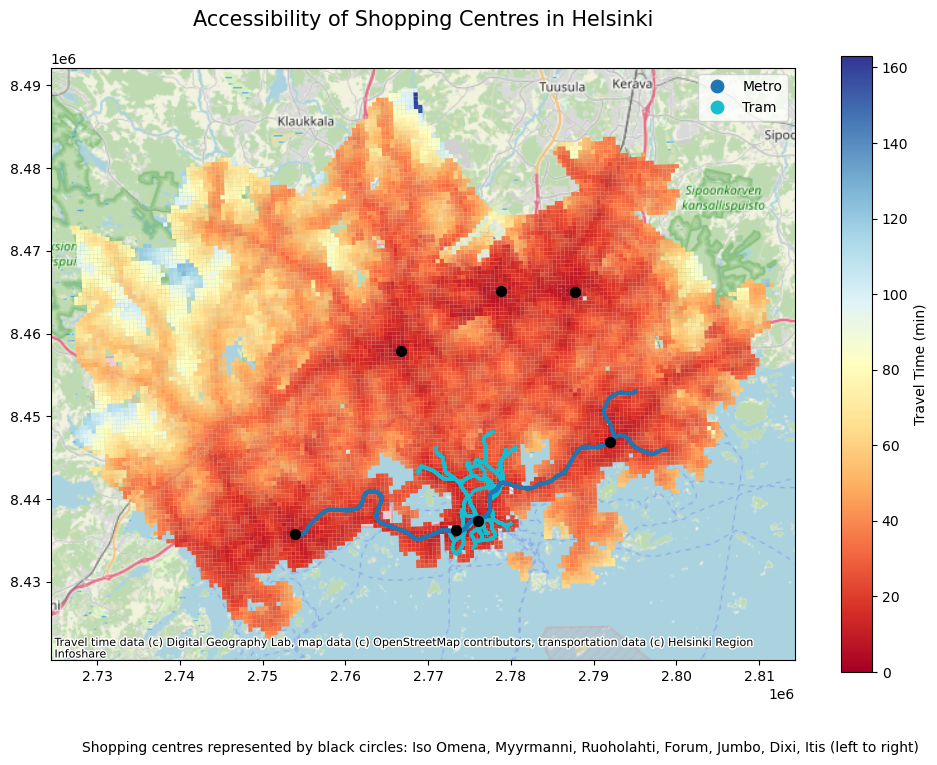

In [117]:
# Plot multi-layers map

# Plot travel time to closest shopping centre for each grid cell
ax = grid.plot(
    figsize=(12, 8),
    column="min_travel_time",
    cmap="RdYlBu",
    linewidth=0,
    legend=True,
    legend_kwds={"label": "Travel Time (min)"}
)

# Plot public transport lines
pt.plot(
    ax=ax,
    column="MODE",
    cmap="tab10",
    linewidth=2.5,
    legend=True,
    zorder=1
)

# Plot shopping centre points
shop_centres.plot(
    ax=ax,
    color="black",
    marker="o",
    markersize=50,
    zorder=2    # Specifies order of layers (low to high = bottom to top)
)

# Set bounds of map
minx, miny, maxx, maxy = grid.total_bounds
minx = minx - 2500.0
miny = miny - 2500.0
maxx = maxx + 2500.0
maxy = maxy + 2500.0
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Add OSM base map
import contextily
contextily.add_basemap(
    ax, 
    source=contextily.providers.OpenStreetMap.Mapnik,
    attribution=(
        "Travel time data (c) Digital Geography Lab, "
        "map data (c) OpenStreetMap contributors, "
        "transportation data (c) Helsinki Region Infoshare" 
    )
)

# Add a caption
import matplotlib.pyplot as plt
caption = "Shopping centres represented by black circles: Iso Omena, Myyrmanni, Ruoholahti, Forum, Jumbo, Dixi, Itis (left to right)"
plt.figtext(0.5, 0.01, caption, ha="center", fontsize=10, wrap=True)

# Add title
ax.set_title("Accessibility of Shopping Centres in Helsinki", fontsize=15, pad=30)

# Write figure to PNG file
plt.savefig(OUTPUT_DIRECTORY / "shopping_centre_accessibility_pt.png")